In [1]:
# 학생 성적 데이터 불러오기

import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/dat.csv')

X = df.drop(['grade'], axis = 1)
y = df.grade

#### 데이터 분할

In [ ]:
#### 데이터 분할

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    X,
    y,
    test_size=0.2, # 데이터 비율 8:2 분할
    random_state=0, # 결과 재현을 위한 임의의 값
    shuffle= True, # 데이터 분할 전에 데이터를 섞을지 여부 
    stratify = None # 층화 샘플링 여부: 
)

# shuffle = False로 설정할 경우 stratif=None으로 설정
#shuffle=False이면 데이터의 순서를 유지하겠다는 의미이고,
#stratify는 레이블 분포를 유지하며 층화 샘플링을 하겠다는 의미입니다.
#이 둘은 상호 충돌할 수 있어서, shuffle=False일 땐 stratify=None이어야 합니다.

In [3]:
# 분할 경과 확인
print('trainX shape', train_X.shape)
print('trainy shape', train_y.shape)
print('testX shape', test_X.shape)
print('testy shape', test_y.shape)

trainX shape (292, 10)
trainy shape (292,)
testX shape (74, 10)
testy shape (74,)


In [5]:
# 층화 샘플링 (X의 school에 대해서)

train_X, test_X, train_y, test_y = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = X['school'],
    random_state = 0
)

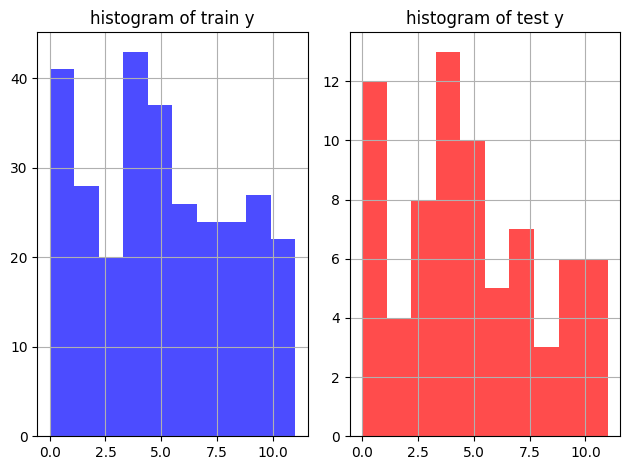

In [6]:
# Target 변수를 기준으로 훈련 데이터와 테스트 데이터의 분포 유사한지 확인
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols = 2)
train_y.hist(ax = axs[0], color = 'blue', alpha = 0.7)
axs[0].set_title('histogram of train y')

test_y.hist(ax = axs[1], color='red', alpha = 0.7)
axs[1].set_title('histogram of test y')

plt.tight_layout();
plt.show();

In [8]:
y

0       1
1       1
2       4
3       9
4       4
       ..
361     0
362     3
363    10
364     4
365     3
Name: grade, Length: 366, dtype: int64

#### 결측치 처리

In [12]:
# 결측치 조회
print(df.isna().sum(axis=0))

school       0
sex          0
paid         0
famrel       0
freetime     0
goout       10
Dalc         0
Walc         0
health       0
absences     0
grade        0
dtype: int64


- 평균 대치법
    - 일변량 변수의 평균으로 결측치를 대치하는 방법
    - 장점: 쉽고 빠르게 결측치 대치 가능
    - 단점: 다른 변수 간의 상관관계를 고려하지 못함, 결측치가 많을 때 평균값의 빈도수가 많아지므로 분포 왜곡

In [ ]:
# 평균 대치법

from sklearn.impute import SimpleImputer

# 훈련 데이터, 테스트 데이터 복사
train_X1 = train_X.copy()
test_X1 = test_X.copy()
imputer_mean = SimpleImputer(strategy='mean')

# goout 변수의 결측치를 평균으로 대치하고 저장
train_X1['goout'] = imputer_mean.fit_transform(train_X1[['goout']]) # fit() + transform()을 동시에 적용하는 메서드 / fit은 데이터를 학습, transform은 학습된 데이터 활용 데이터 변환
test_X1['goout'] = imputer_mean.transform(test_X1[['goout']])

print('학습 데이터 goout 변수 결측치 확인:', train_X1['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인:', train_X1['goout'].isna().sum())

학습 데이터 goout 변수 결측치 확인: 0
테스트 데이터 goout 변수 결측치 확인: 0


- 중앙값 대치법
    - 일변량 변수의 중앙값으로 결측치를 대치하는 방법
    - 장점: 쉽고 빠르게 결측치 대치 가능
    - 단점: 다른 변수 간의 관계를 고려하지 못함, 결측치가 많을 때 중앙값의 빈도수가 많아지므로 분포 왜곡

In [14]:
# 중앙값 대치법

train_X2 = train_X.copy()
test_X2 = test_X.copy()

imputer_median = SimpleImputer(strategy= 'median')
train_X2['goout'] = imputer_median.fit_transform(train_X2[['goout']])
test_X2['goout'] = imputer_median.fit_transform(test_X2[['goout']])

print('학습 데이터 goout 변수 결측치 확인', train_X2['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인', test_X2['goout'].isna().sum())

학습 데이터 goout 변수 결측치 확인 0
테스트 데이터 goout 변수 결측치 확인 0


- 최빈값 대치법
    - 일변량 변수의 최빈값으로 결측치를 대치하는 방법
    - 장점: 빠르고 쉽게 대치 가능
    - 단점: 상관관계 고려 못함, 클래스 불균형 심화시킬 수 있음

In [16]:
# 최빈갑 대치법

train_X3 = train_X.copy()
test_X3 = test_X.copy()

imputer_mode = SimpleImputer(strategy= 'most_frequent')
train_X3['goout'] = imputer_mode.fit_transform(train_X3[['goout']])
test_X3['goout'] = imputer_mode.fit_transform(test_X3[['goout']])

print('학습 데이터 goout 변수 결측치 확인:', train_X3['goout'].isna().sum())
print('테스트 데이터 goout 변수 결측치 확인:', test_X3['goout'].isna().sum())

학습 데이터 goout 변수 결측치 확인: 0
테스트 데이터 goout 변수 결측치 확인: 0


- KNN을 이용한 대치법
    - k개의 이웃을 택한 후, 이웃 관측치의 정보를 활용하여 결측치를 대치하는 방법
    - 장점: 데이터에 대한 가정 없이 쉽고 빠르게 결측치 대치 가능
    - 단점: 변수 스케일 및 이상치에 민감, 고차원 데이터일 경우 모델 성능이 떨어질 수 있음

In [19]:
from sklearn.impute import KNNImputer

train_X5 = train_X.copy()
test_X5 = test_X.copy()

# 수치형 컬럼만 선택
train_X5_num = train_X5.select_dtypes('number')
test_X5_num = test_X5.select_dtypes('number')

train_X5_cat = train_X5.select_dtypes('object')
test_X5_cat = test_X5.select_dtypes('object')

# 이웃의 크기가 5인 KNN 모형의 예측값을 이용
knnimputer = KNNImputer(n_neighbors= 5)

train_X5_num_imputed = knnimputer.fit_transform(train_X5_num)
test_X5_num_imputed = knnimputer.transform(test_X5_num)

In [20]:
test_X5_num_imputed

array([[ 4. ,  1. ,  1. ,  2. ,  2. ,  5. ,  0. ],
       [ 4. ,  3. ,  5. ,  1. ,  5. ,  2. ,  2. ],
       [ 5. ,  4. ,  5. ,  2. ,  3. ,  5. ,  0. ],
       [ 4. ,  2. ,  5. ,  1. ,  2. ,  5. ,  2. ],
       [ 2. ,  2. ,  2. ,  1. ,  1. ,  3. ,  0. ],
       [ 5. ,  4. ,  2. ,  1. ,  1. ,  5. ,  0. ],
       [ 4. ,  3. ,  2. ,  1. ,  3. ,  3. ,  0. ],
       [ 5. ,  4. ,  2. ,  3. ,  4. ,  5. ,  0. ],
       [ 4. ,  3. ,  4. ,  1. ,  1. ,  5. ,  9. ],
       [ 4. ,  2. ,  2. ,  2. ,  2. ,  5. ,  0. ],
       [ 3. ,  2. ,  3. ,  1. ,  1. ,  4. ,  4. ],
       [ 5. ,  2. ,  2. ,  1. ,  1. ,  5. ,  8. ],
       [ 2. ,  3. ,  4. ,  2. ,  3. ,  2. ,  0. ],
       [ 4. ,  2. ,  4. ,  1. ,  1. ,  4. , 14. ],
       [ 4. ,  3. ,  4. ,  2. ,  5. ,  5. ,  0. ],
       [ 4. ,  4. ,  3. ,  1. ,  1. ,  1. ,  4. ],
       [ 4. ,  2. ,  2. ,  1. ,  1. ,  3. , 12. ],
       [ 4. ,  3. ,  2. ,  1. ,  4. ,  5. ,  6. ],
       [ 4. ,  3. ,  4. ,  1. ,  4. ,  5. ,  0. ],
       [ 4. ,  5. ,  2. ,  2. ,